In [18]:
from collections import defaultdict
from matplotlib import pyplot as plt

import os
import re
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(
    "archive/UkraineCombinedTweetsDeduped20220227-131611.csv.gzip", 
    compression="gzip",
    index_col="Unnamed: 0"
)
df.head()

C:\Users\Flo\AppData\Local\Temp\ipykernel_16592\3839880814.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,962369743,toonspt_,พยรลก 😉\nจะเปิดแอคเมื่อขายของเท่านั้น!!,NaN,462,7,20549,2012-11-21 13:01:19.000000,1496738675085897729,2022-02-24 06:48:02.000000,1897,Footage of the airport bombing in Ivano-Franki...,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t...",en,NaN,0,2022-02-24 06:51:34.430620
1,865846412755353600,SabrinaBbsmith,อ้ายคือปริญญาใจน้องจึงยิ้มได้วันนี้ #สมรสเท่าเ...,Just go for it,385,503,84016,2017-05-20 08:27:26.000000,1496738675140538368,2022-02-24 06:48:02.000000,3534,12.37 น. เจมส์ วอเตอร์เฮาส์ ผู้สื่อข่าว BBC ใน...,[],th,NaN,0,2022-02-24 06:51:34.421428
2,1927022036,haleggwenn,"Mathe & Kulturanthropologie • Feminismus, Anti...","Göttingen, Germany",251,51,78,2013-10-02 14:19:01.000000,1496738675522248706,2022-02-24 06:48:02.000000,0,"Die Rede von #Putin ist echt gruselig:\n""Russl...","[{'text': 'Putin', 'indices': [13, 19]}, {'tex...",de,NaN,0,2022-02-24 06:51:34.412324
3,1073676020,IndiaTodayFLASH,No dragging feet on news. Crisp & short news s...,NaN,117,1152610,589066,2013-01-09 12:46:38.000000,1496738675584954371,2022-02-24 06:48:02.000000,18,Ukraine MP Sophia Fedyna tells about the groun...,"[{'text': 'ITVideo', 'indices': [130, 138]}]",en,NaN,0,2022-02-24 06:51:34.403108
4,1484119658488033281,sandsand_fight,NaN,NaN,128,3,691,2022-01-20 11:05:01.000000,1496738675710857224,2022-02-24 06:48:03.000000,3974,รัสเซียยิงขีปนาวุธรัวๆไปยังยูเครน\n#รัสเซียยูเ...,"[{'text': 'รัสเซียยูเครน', 'indices': [50, 64]...",th,NaN,0,2022-02-24 06:51:34.393984


In [3]:
def extract_ht(string):
    """ Extract hashtag from stringified list """
    return re.findall(r"(?<=[\"\']text[\"\']: [\"\'])\w+(?=[\"\'],)", string)

df['hashtags'] = df['hashtags'].apply(extract_ht)
df['hashtags'].head()

0                       [Ukraine, Russia]
1                                      []
2                        [Putin, Ukraine]
3                               [ITVideo]
4    [RussiaUkraine, UkraineRussiaCrisis]
Name: hashtags, dtype: object

# Basic exploration

In [4]:
def explore(col: str):
    """ Shows basic stats and plots histogram """
    print(df[col].describe())
    df[col].hist(log=True, bins=20)
    plt.show()

count    1.229349e+06
mean     4.434949e+04
std      1.082518e+05
min      0.000000e+00
25%      1.223000e+03
50%      8.518000e+03
75%      3.914100e+04
max      4.238289e+06
Name: totaltweets, dtype: float64


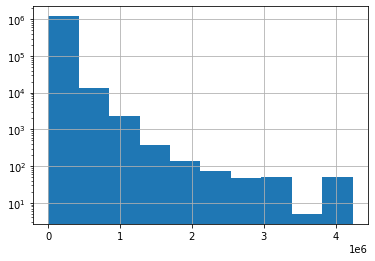

In [5]:
explore('totaltweets')

count    1.229349e+06
mean     1.359178e+03
std      5.679755e+03
min      0.000000e+00
25%      1.370000e+02
50%      4.330000e+02
75%      1.269000e+03
max      1.422324e+06
Name: following, dtype: float64


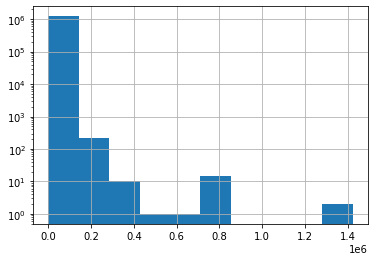

In [6]:
explore('following')

count    1.229349e+06
mean     9.837248e+03
std      2.390025e+05
min      0.000000e+00
25%      4.500000e+01
50%      2.310000e+02
75%      9.890000e+02
max      1.750050e+07
Name: followers, dtype: float64


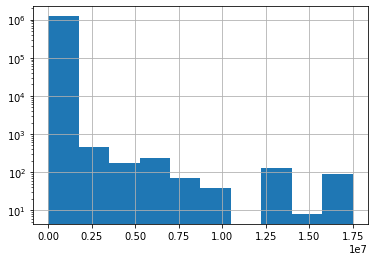

In [7]:
explore('followers')

count    1.229349e+06
mean     3.430804e+03
std      1.327360e+04
min      0.000000e+00
25%      3.000000e+00
50%      6.300000e+01
75%      6.790000e+02
max      1.339370e+05
Name: retweetcount, dtype: float64


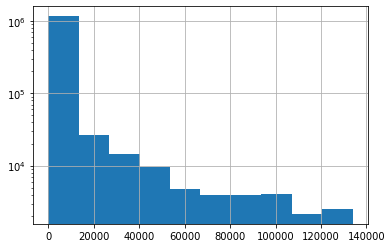

In [8]:
explore('retweetcount')

## Scatter plots

In [ ]:
def plot_scatter(x: str, y: str):
    """ Plots scatter plot """
    df.plot.scatter(x, y, logx=True, logy=True, alpha=.3)

<AxesSubplot:xlabel='totaltweets', ylabel='following'>

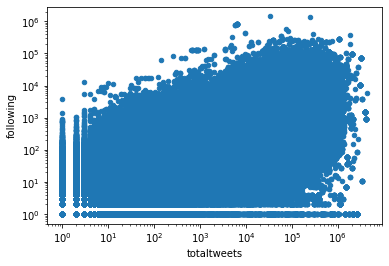

In [9]:
plot_scatter('totaltweets', 'following')

<AxesSubplot:xlabel='totaltweets', ylabel='following'>

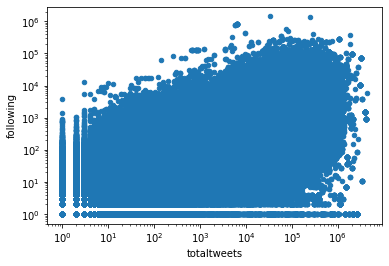

In [9]:
plot_scatter('totaltweets', 'followers')

<AxesSubplot:xlabel='totaltweets', ylabel='following'>

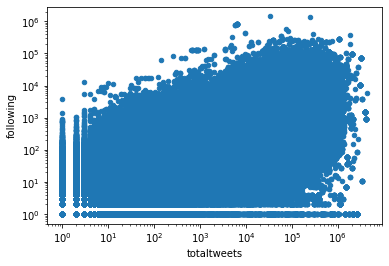

In [9]:
plot_scatter('totaltweets', 'retweetcount')


# Hashtags

In [12]:
counter = defaultdict(int)
for hashtags in df['hashtags']:
    for hashtag in hashtags:
        counter[hashtag] += 1
counter = pd.Series(counter)

count     68148.000000
mean         35.598976
std        2039.913312
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      456618.000000
dtype: float64


<AxesSubplot:>

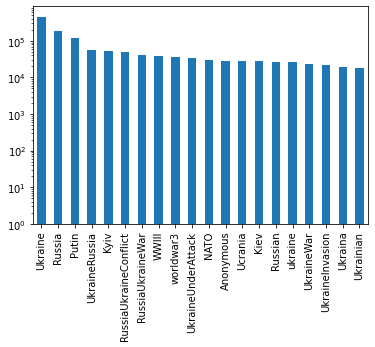

In [13]:
counter = counter.sort_values(ascending=False)
print(counter.describe())
counter.iloc[:20].plot.bar(log=True)

## Best hashtags

In [14]:
top = 100
best_ht = counter.iloc[:top]

In [25]:
ht_pair = pd.DataFrame(index=best_ht.index, columns=best_ht.index)
ht_pair = ht_pair.fillna(0)

for hashtags in df['hashtags']:
    hashtags = [ 
        ht for ht in hashtags
        if ht in best_ht.index
    ]
    
    if len(hashtags) > 1:
        for i, ht_1 in enumerate(hashtags):
            for ht_2 in hashtags[i+1:]:
                ht_pair.loc[ht_1, ht_2] += 1
                ht_pair.loc[ht_2, ht_1] += 1

for i in range(len(best_ht)):
    ht_pair.iloc[i, i] = 0
ht_pair.head()

,Ukraine,Russia,Putin,UkraineRussia,Kyiv,RussiaUkraineConflict,RussiaUkraineWar,WWIII,worldwar3,UkraineUnderAttack,...,War,Swift,Germany,OpRussia,Taiwan,Guerra,URGENTE,India,Donbass,แตงโม
Ukraine,0,117482,39418,20820,22221,20135,11725,7270,10934,15231,...,2057,1370,936,1176,1630,363,472,1283,1383,941
Russia,117482,0,18353,9068,14809,17531,5021,4193,7273,4971,...,1835,1766,1141,1000,1347,752,568,1289,1087,97
Putin,39418,18353,0,6761,3442,10353,2456,9531,9794,2673,...,490,167,313,57,335,629,439,248,430,222
UkraineRussia,20820,9068,6761,0,2413,4215,6185,1224,3485,8984,...,248,49,89,128,50,130,57,180,71,352
Kyiv,22221,14809,3442,2413,0,1836,1995,914,1277,2164,...,279,7,65,17,61,39,94,46,196,0


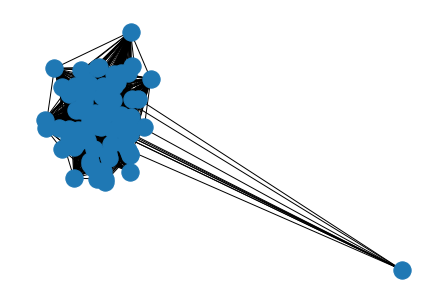

In [26]:
G = nx.from_pandas_adjacency(ht_pair)
nx.draw(G)